## Arquivo com métricas e gráficos usados na comparação de diferentes BMP280

In [35]:
import pandas as pd
dados = pd.read_csv("comparacaoDoisSensores.csv")
dados

,Data,Hora,Pressao Atmosferica 1,Temperatura 1,Pressao Atmosferica 2,Temperatura 2
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880
...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253


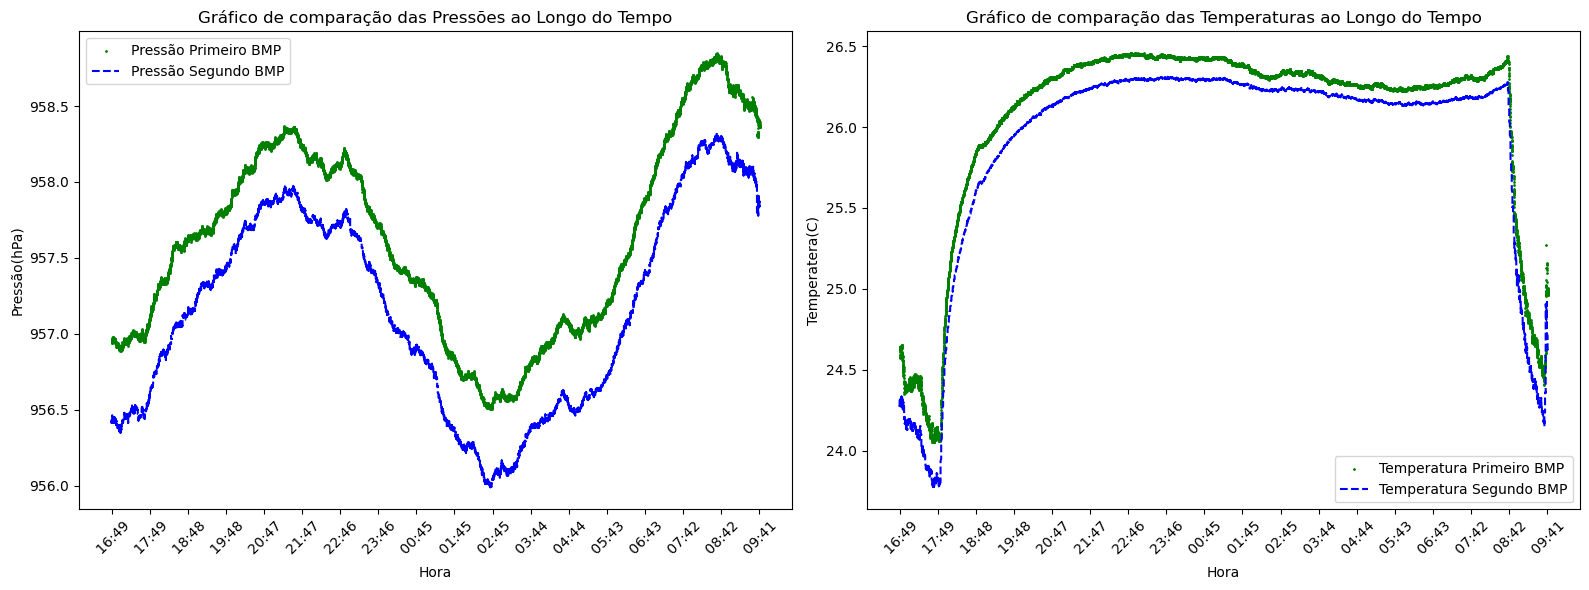

In [36]:
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
plt.figure(figsize=(16, 6))  # Ajuste o tamanho conforme desejado

# Subplot para o gráfico da altitude
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro subplot
plt.scatter(dados["Hora"], dados["Pressao Atmosferica 1"], color='green', label='Pressão Primeiro BMP', s=1)
plt.plot(dados["Hora"], dados["Pressao Atmosferica 2"], color='blue', linestyle='--', label='Pressão Segundo BMP')
plt.xlabel("Hora")
plt.ylabel("Pressão(hPa)")
plt.title("Gráfico de comparação das Pressões ao Longo do Tempo")
plt.xticks(rotation=45)
plt.legend()

total_pontos = len(dados["Hora"])
intervalo = total_pontos // 17
plt.xticks(dados["Hora"][::intervalo], rotation=45)

plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, primeiro subplot
plt.scatter(dados["Hora"], dados["Temperatura 1"], color='green', label='Temperatura Primeiro BMP', s=1)
plt.plot(dados["Hora"], dados["Temperatura 2"], color='blue', linestyle='--', label='Temperatura Segundo BMP')
plt.xlabel("Hora")
plt.ylabel("Temperatera(C)")
plt.title("Gráfico de comparação das Temperaturas ao Longo do Tempo")
plt.xticks(rotation=45)
plt.legend()

total_pontos = len(dados["Hora"])
intervalo = total_pontos // 17
plt.xticks(dados["Hora"][::intervalo], rotation=45)
# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Exibindo os subplots
plt.show()


### Utilizando fórmulas de altitude

![Fórmula de Altitude a partir da Fórmula Barométrica](images\Capturar.PNG)


Na fórmula barométrica descrita acima, tem-se:
* h = Altitude
* P = Pressão Medida
* Po = Pressão Referencial, à nivel do mar

Nota-se que sem a presença da temperatura não há como acontecer o balanceamento dos valores mensurados.

In [37]:
import math 

altitude_sem_temp_1 = [] # lista que virá a ser uma coluna do DataFrame

po = 1013.25 # pressão à nivel do mar

for i in range(0, len(dados["Pressao Atmosferica 1"])):
    pressaoN = dados["Pressao Atmosferica 1"].iloc[i]
    altitude = 44330.0 * (1.0 - ((pressaoN) / po) ** (1.0 / 5.255))
    altitude_sem_temp_1.append(round(altitude, 2))

dados['Altitude(S/T) Primeiro Sensor'] = altitude_sem_temp_1

altitude_sem_temp_2 = []

for i in range(0, len(dados["Pressao Atmosferica 2"])):
    pressaoN = dados["Pressao Atmosferica 2"].iloc[i]
    altitude = 44330.0 * (1.0 - ((pressaoN) / po) ** (1.0 / 5.255))
    altitude_sem_temp_2.append(round(altitude, 2))

dados['Altitude(S/T) Segundo Sensor'] = altitude_sem_temp_2



# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica 1,Temperatura 1,Pressao Atmosferica 2,Temperatura 2,Altitude(S/T) Primeiro Sensor,Altitude(S/T) Segundo Sensor
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,479.72,484.17
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,479.62,484.23
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,479.64,484.30
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,479.68,484.29
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,479.63,484.17
...,...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,467.29,471.65
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,467.23,471.60
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,467.23,471.71
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,467.21,471.63


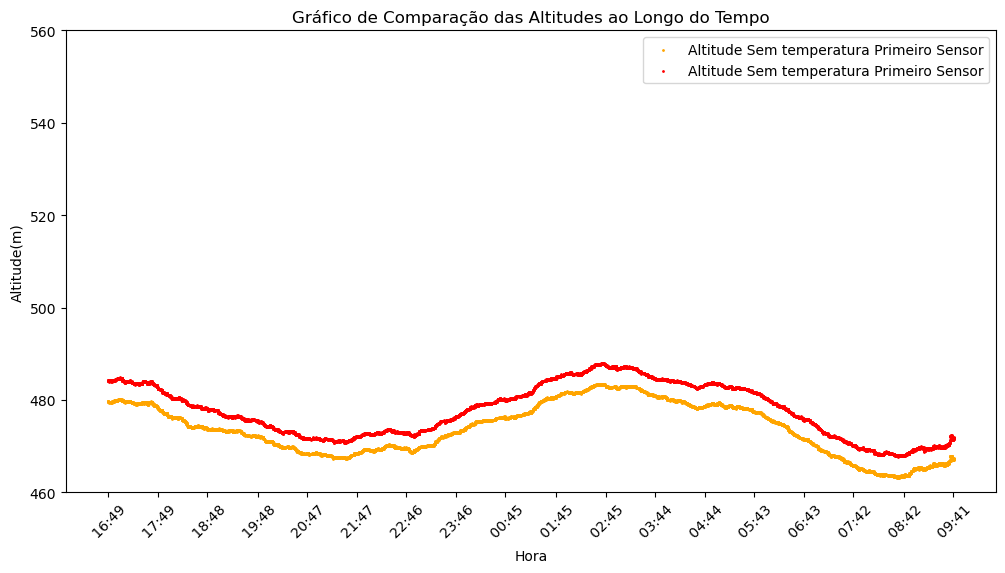

In [38]:

plt.figure(figsize=(12, 6))  # Dimensões da figura

lim_inferior_Y = 460
lim_superior_Y = 560

# Plotando a altitude com temperatura - Segunda fórmula
plt.scatter(dados["Hora"], dados["Altitude(S/T) Primeiro Sensor"], color='orange', label='Altitude Sem temperatura Primeiro Sensor', s=1)

# Plotando a altitude com temperatura - Quarta fórmula
plt.scatter(dados["Hora"], dados["Altitude(S/T) Segundo Sensor"], color='red', label='Altitude Sem temperatura Primeiro Sensor', s=1)

plt.xlabel("Hora")  # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)")  # Altitude como eixo Y do gráfico
plt.title("Gráfico de Comparação das Altitudes ao Longo do Tempo")

# Definindo limites e intervalos do eixo X
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 17
plt.xticks(dados["Hora"][::intervalo], rotation=45)

plt.ylim(lim_inferior_Y, lim_superior_Y)
plt.legend()
plt.show()


In [39]:
maximo = dados["Altitude(S/T) Primeiro Sensor"].max()
minimo = dados["Altitude(S/T) Primeiro Sensor"].min()
diferenca = maximo - minimo

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximo)
print("Mínimo:", minimo)
print("Diferença: {:.2f}".format(diferenca))

Máximo: 483.53
Mínimo: 463.09
Diferença: 20.44


### * Fórmula Hipsométrica / Segunda Fórmula


![Fórmula de Altitude a partir da Fórmula Hipsométrica](images\Capturar3.PNG)


In [46]:
#dados = dados.drop(columns=['Altitude(S/T) Primeiro Sensor', 'Altitude(S/T) Segundo Sensor'])

altitude_com_temp_1 = [] # lista que virá a ser uma coluna do DataFrame

po = 1013.25 # pressão à nivel do mar

for i in range(0, len(dados["Pressao Atmosferica 1"])):
    pressaoN = dados["Pressao Atmosferica 1"].iloc[i]
    tempN = dados["Temperatura 1"].iloc[i]
    altitude = (((pressaoN / po) ** (1 / 5.255) - 1) * (tempN + 273.15) / 0.0065) * -1
    altitude_com_temp_1.append(round(altitude, 2))

dados['Altitude(C/T) Primeiro Sensor'] = altitude_com_temp_1

altitude_com_temp_2 = []

for i in range(0, len(dados["Pressao Atmosferica 2"])):
    pressaoN = dados["Pressao Atmosferica 2"].iloc[i]
    tempN = dados["Temperatura 2"].iloc[i]
    altitude = (((pressaoN / po) ** (1 / 5.255) - 1) * (tempN + 273.15) / 0.0065) * -1
    altitude_com_temp_2.append(round(altitude, 2))

dados['Altitude(C/T) Segundo Sensor'] = altitude_com_temp_2



# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica 1,Temperatura 1,Pressao Atmosferica 2,Temperatura 2,Altitude(C/T) Primeiro Sensor,Altitude(C/T) Segundo Sensor
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,495.69,499.77
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,495.56,499.82
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,495.59,499.90
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,495.64,499.89
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,495.60,499.78
...,...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,483.52,487.46
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,483.43,487.38
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,483.41,487.48
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,483.37,487.39


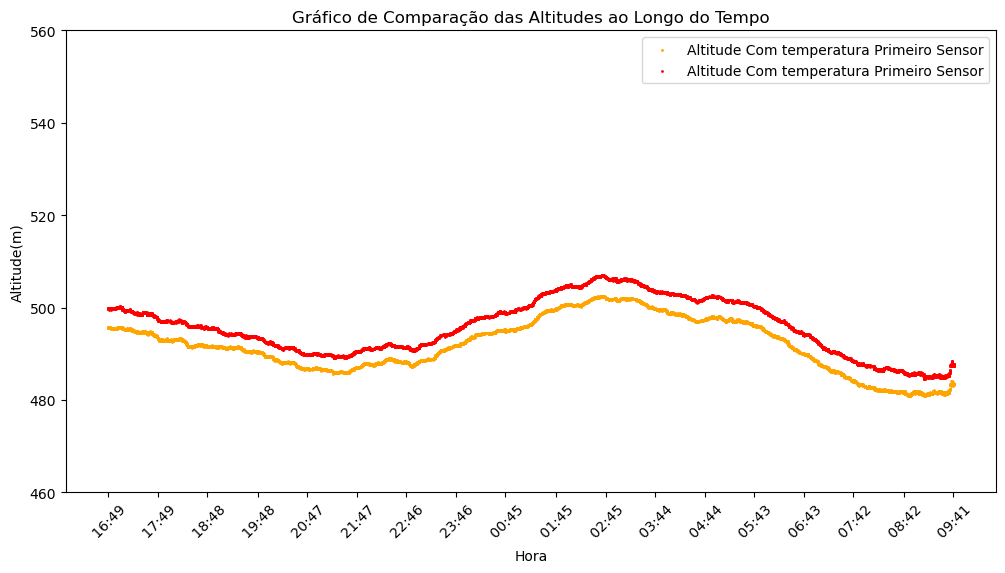

In [44]:

plt.figure(figsize=(12, 6))  # Dimensões da figura

lim_inferior_Y = 460
lim_superior_Y = 560

# Plotando a altitude com temperatura - Segunda fórmula
plt.scatter(dados["Hora"], dados["Altitude(C/T) Primeiro Sensor"], color='orange', label='Altitude Com temperatura Primeiro Sensor', s=1)

# Plotando a altitude com temperatura - Quarta fórmula
plt.scatter(dados["Hora"], dados["Altitude(C/T) Segundo Sensor"], color='red', label='Altitude Com temperatura Primeiro Sensor', s=1)

plt.xlabel("Hora")  # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)")  # Altitude como eixo Y do gráfico
plt.title("Gráfico de Comparação das Altitudes ao Longo do Tempo")

# Definindo limites e intervalos do eixo X
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 17
plt.xticks(dados["Hora"][::intervalo], rotation=45)

plt.ylim(lim_inferior_Y, lim_superior_Y)
plt.legend()
plt.show()


In [45]:
maximoTemp = dados["Altitude(C/T) Primeiro Sensor"].max()
minimoTemp = dados["Altitude(C/T) Primeiro Sensor"].min()
diferencaTemp = maximoTemp - minimoTemp

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximoTemp)
print("Mínimo:", minimoTemp)
print("Diferença: {:.2f}".format(diferencaTemp))

Máximo: 502.54
Mínimo: 480.83
Diferença: 21.71


### Terceira Fórmula de altitude / Calculando a partir de um referêncial

![Fórmula de Altitude a partir da Fórmula Hipsométrica](images\Capturar4.PNG)


As variáveis são:

* K é uma constante e vale 67.4073 quando a altura está em metros
* Tm é a temperatura medida em Kelvin
* P1 é a pressão no solo referencial
* P2 é a pressão no segundo ponto
* H é a altura medida entre o ponto P2 e P1

In [52]:
#dados = dados.drop(columns=['Altitude(S/T) Primeiro Sensor', 'Altitude(S/T) Segundo Sensor'])

altitude_com_temp = [] # lista que virá a ser uma coluna do DataFrame

po = 1013.25 # pressão à nivel do mar

for i in range(0, len(dados["Pressao Atmosferica 1"])):
    pressaoN1 = dados["Pressao Atmosferica 1"].iloc[i]
    pressaoN2 = dados["Pressao Atmosferica 2"].iloc[i]
    tempN = dados["Temperatura 1"].iloc[i]
    
    altitude = 67.4073*(tempN + 273)*math.log(pressaoN1 / pressaoN2)
    altitude_com_temp.append(round(altitude, 2))

dados['Altitude Segunda fórmula(C/T)'] = altitude_com_temp

# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica 1,Temperatura 1,Pressao Atmosferica 2,Temperatura 2,Altitude Segunda fórmula(C/T)
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,10.69
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,11.09
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,11.20
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,11.08
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,10.91
...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,10.51
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,10.52
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,10.78
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,10.64


In [54]:
maximoTemp = dados["Altitude Segunda fórmula(C/T)"].max()
minimoTemp = dados["Altitude Segunda fórmula(C/T)"].min()

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximoTemp)
print("Mínimo:", minimoTemp)

Máximo: 12.39
Mínimo: 6.67


### Quarta Fórmula de altitude / Calculando a partir de um referêncial

In [57]:
dados = dados.drop(columns=['Altitude Segunda fórmula(C/T)'])

altitude_sem_temp = [] # lista que virá a ser uma coluna do DataFrame

po = 1013.25 # pressão à nivel do mar

for i in range(0, len(dados["Pressao Atmosferica 1"])):
    pressaoN1 = dados["Pressao Atmosferica 1"].iloc[i]
    pressaoN2 = dados["Pressao Atmosferica 2"].iloc[i]
    
    altitude = 44330 * (1.0 - pow((pressaoN2)/pressaoN1, (1/5.255)))
    altitude_sem_temp.append(round(altitude, 2))

dados['Altitude Segunda fórmula(S/T)'] = altitude_sem_temp

# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica 1,Temperatura 1,Pressao Atmosferica 2,Temperatura 2,Altitude Segunda fórmula(S/T)
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,4.50
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,4.66
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,4.71
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,4.66
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,4.59
...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,4.41
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,4.42
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,4.53
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,4.47


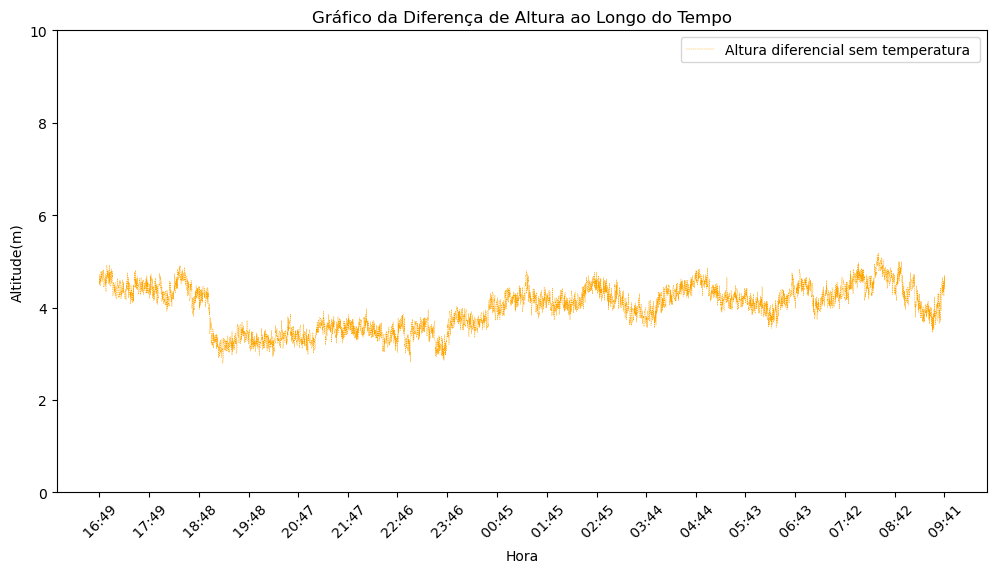

In [69]:

plt.figure(figsize=(12, 6))  # Dimensões da figura

lim_inferior_Y = 0
lim_superior_Y = 10

# Plotando a altitude com temperatura - Segunda fórmula
plt.plot(dados["Hora"], dados["Altitude Segunda fórmula(S/T)"], color='orange', linestyle='--', linewidth=0.3, label='Altura diferencial sem temperatura ')


plt.xlabel("Hora")  # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)")  # Altitude como eixo Y do gráfico
plt.title("Gráfico da Diferença de Altura ao Longo do Tempo")

# Definindo limites e intervalos do eixo X
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 17
plt.xticks(dados["Hora"][::intervalo], rotation=45)

plt.ylim(lim_inferior_Y, lim_superior_Y)
plt.legend()
plt.show()


In [66]:
maximo = dados["Altitude Segunda fórmula(S/T)"].max()
minimo = dados["Altitude Segunda fórmula(S/T)"].min()

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximo)
print("Mínimo:", minimo)

Máximo: 5.18
Mínimo: 2.79


### Calculando a Diferença entre as Pressões

In [81]:

diferenca = dados["Pressao Atmosferica 1"] - dados["Pressao Atmosferica 2"]
diferenca = round(diferenca, 2)

dados['diferenca'] = diferenca

dados.to_csv('dadosFormatados.csv', index=False)

maximo = max(diferenca)
media = diferenca.mean()
print("Máximo da diferença: {:.2f}hpa".format(maximo))
print("Média da diferença: {:.2f}hpa".format(media))

Máximo da diferença: 0.59hpa
Média da diferença: 0.45hpa


Agora que o "Off-set" foi encontrado, irei atribuir essa média de diferença no cálculo feito acima, afim de eliminar a divergência inerente a cada unidade do BMP280

In [83]:
dados = dados.drop(columns=['Altitude Segunda fórmula(S/T)', 'diferenca'])

altitude_sem_temp = [] # lista que virá a ser uma coluna do DataFrame

for i in range(0, len(dados["Pressao Atmosferica 1"])):
    pressaoN1 = dados["Pressao Atmosferica 1"].iloc[i]
    pressaoN2 = dados["Pressao Atmosferica 2"].iloc[i] + media
    
    altitude = 44330 * (1.0 - pow((pressaoN2)/pressaoN1, (1/5.255)))
    altitude_sem_temp.append(round(altitude, 2))

dados['Altitude Segunda fórmula(S/T) - Offset'] = altitude_sem_temp

# Salvando o DataFrame atualizado de volta ao arquivo .csv
dados.to_csv('dadosFormatados.csv', index=False)
dados

,Data,Hora,Pressao Atmosferica 1,Temperatura 1,Pressao Atmosferica 2,Temperatura 2,Altitude Segunda fórmula(S/T) - Offset
0,2024/05/09,16:49,956.9403,24.5897,956.4305,24.2790,0.49
1,2024/05/09,16:49,956.9523,24.5757,956.4236,24.2755,0.66
2,2024/05/09,16:49,956.9495,24.5744,956.4152,24.2791,0.70
3,2024/05/09,16:49,956.9447,24.5798,956.4163,24.2784,0.65
4,2024/05/09,16:49,956.9504,24.5904,956.4302,24.2880,0.58
...,...,...,...,...,...,...,...
12061,2024/05/10,09:42,958.3671,25.0026,957.8658,24.6509,0.41
12062,2024/05/10,09:42,958.3736,24.9887,957.8719,24.6390,0.42
12063,2024/05/10,09:42,958.3732,24.9738,957.8591,24.6272,0.53
12064,2024/05/10,09:42,958.3762,24.9649,957.8687,24.6253,0.47


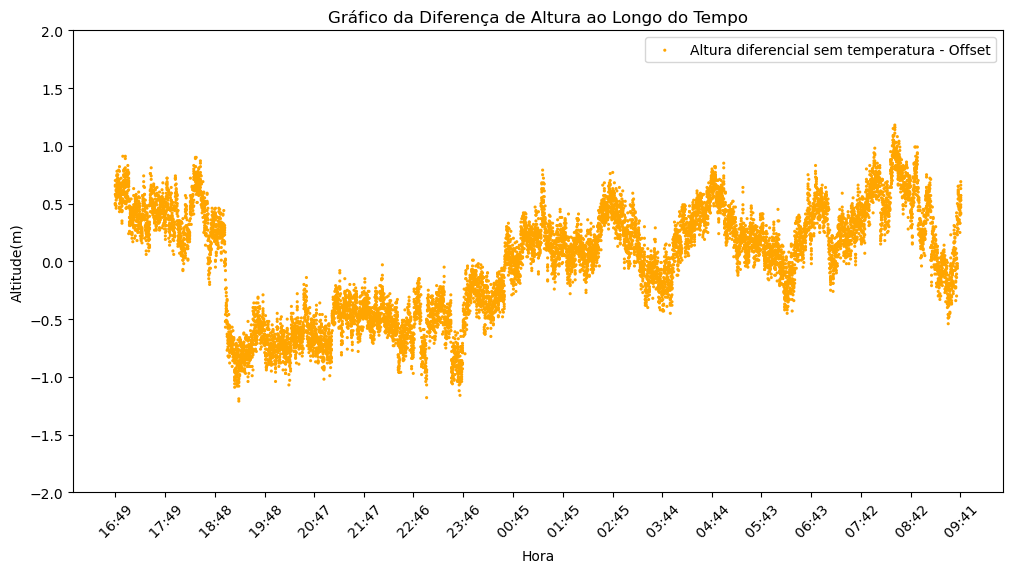

In [95]:

plt.figure(figsize=(12, 6))  # Dimensões da figura

lim_inferior_Y = -2
lim_superior_Y = 2

# Plotando a altitude com temperatura - Segunda fórmula
plt.scatter(dados["Hora"], dados["Altitude Segunda fórmula(S/T) - Offset"], color='orange', linestyle='--', linewidth=0.01, label='Altura diferencial sem temperatura - Offset', s = 5)


plt.xlabel("Hora")  # Hora como eixo X do gráfico
plt.ylabel("Altitude(m)")  # Altitude como eixo Y do gráfico
plt.title("Gráfico da Diferença de Altura ao Longo do Tempo")

# Definindo limites e intervalos do eixo X
total_pontos = len(dados["Hora"])
intervalo = total_pontos // 17
plt.xticks(dados["Hora"][::intervalo], rotation=45)

plt.ylim(lim_inferior_Y, lim_superior_Y)
plt.legend()
plt.show()


In [97]:
maximo = dados["Altitude Segunda fórmula(S/T) - Offset"].max()
minimo = dados["Altitude Segunda fórmula(S/T) - Offset"].min()

# Imprimindo o valor máximo e mínimo
print("Máximo:", maximo)
print("Mínimo:", minimo)

Máximo: 1.18
Mínimo: -1.21
